# <center>IMAGE PROCESSING PROJECT</center>

##### <CENTER> 21127141 - BÙI ĐỖ DUY QUÂN </CENTER>

## 1.Import libraries

In [523]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 2. Support functions

### a. Read and show image

In [524]:
def read_Image(filename):
    return np.array(Image.open(filename))

def show_Image(image):
    plt.imshow(image)
    plt.show()

def show_Image_side_by_side(image1, image2):

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))


    axes[0].imshow(image1)
    axes[0].axis('off')
    axes[0].set_title('Original Image', fontsize=16)

    axes[1].imshow(image2)
    axes[1].axis('off')
    axes[1].set_title('Result', fontsize=16)

    plt.subplots_adjust(wspace=0.05)
    plt.show()

## b. Check value of color

In [525]:
#input: matrix of image
#output: matrix of image that limited between 0 and 255
def truncate(image):
    return np.clip(image, 0, 255)

## c. Menu functions

In [526]:
def Menu(Feature_Name):
    print("Choose your option (1-10):")
    for i, name in enumerate(Feature_Name):
        print(i+1, name)

    option = int(input("Your option: "))
    
    flip_dir = -1
    flip_name = ["vertically", "horizontally"]
    if option == 3:
        flip_dir = int(input("choose 0 (vertically) or 1 (horizontally):"))


    print("\nYour option is:", Feature_Name[option-1] + " " + flip_name[flip_dir] if flip_dir != -1 else Feature_Name[option-1])
    return option, flip_dir

## d. Image processing

In [527]:
def Processing(Original, Features_Functions, option, flip_dir=None):
    if  option == 3:
        result = Features_Functions[option-1](Original, flip_dir)
    elif option == 7:
        gray = convert_To_Gray(Original)
        gray = convert_To_Blur(gray)
        result = Features_Functions[option-1](gray)
        Original = gray
    else:
        result = Features_Functions[option-1](Original)
        
    return Original, result

# 3. Feature functions

## a. Brightness image

In [528]:
#input: matrix of image, the level of brightness(int)
#output: matrix of image that brightness is changed
def bright_Image(image, brightness=50):
    return truncate(image.astype('int16') + brightness).astype('uint8')

## b. Contrast image

In [529]:
#input: matrix of image, the level of contrast(int)
#output: matrix of image that contrast is changed
def contrast_Image(image, ContrastValue=50):
    factor = (259 * (ContrastValue + 255)) / (255 * (259 - ContrastValue))
    image_contrast = factor * (image.astype('int16') - 128) + 128
    return truncate(image_contrast.astype('int16')).astype('uint8')

## c. Flip image

In [530]:
def flip_Image(image, dir=0):
    return np.flip(image, axis=dir)

## d. Convert gray image

In [531]:
def convert_To_Gray(image):
   coefficient = np.array([[.299, .587, .114]])
   gray = (image * coefficient[None, :]).sum(axis=-1).astype('uint8')
   return np.repeat(gray[:, :, None], 3, axis=-1)

## e. Convert sepia image

In [532]:
def convert_To_Sepia(img):
    sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])
    sepia_img = img.dot(sepia_filter.T)
    return truncate(sepia_img.astype('int16')).astype('uint8')


## f. Convert blur image

In [533]:
def convert_To_Blur(image):
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
    blur = np.array(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            blur[i][j] = np.sum(image[i-1:i+2, j-1:j+2,:].astype(np.float64) * kernel[:, :, None], axis=(0, 1))
    return blur.astype('uint8')

## g. Convert sharpen image

In [534]:
def convert_To_Sharpen(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    Sharpen = np.array(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            Sharpen[i][j] = np.sum(image[i-1:i+2, j-1:j+2,:]* kernel[:, :, None], axis=(0, 1))
    return Sharpen

## h. Cut image from center

In [535]:
def cut_From_Center(image, h=256, w=256):
    return image[image.shape[0]//2 - h//2:image.shape[0]//2 + h//2, image.shape[1]//2 - w//2:image.shape[1]//2 + w//2]

## i. Cut image to circle frame

In [536]:
def cut_Circle_frame(img):
    new_img = np.array(img)
    for x in range(new_img.shape[0]):
        for y in range(new_img.shape[1]):
            if (x - new_img.shape[0]//2)**2 + (y - new_img.shape[1]//2)**2 > (new_img.shape[0]//2)**2:
                new_img[x][y] = 0
    return new_img

## k. Cut image to 2 ellipse frame

In [537]:
def cut_2Ellipses_Frame(image):
    center_x = image.shape[0]//2
    center_y = image.shape[1]//2
    new_img = np.array(image)
    A = image.shape[1]//4
    B = image.shape[1] - A
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            new_x = x - center_x
            new_y = y - center_y
            if (new_x+new_y)**2 / A + (new_x-new_y)**2 / B > image.shape[1] and ((new_x+new_y)**2 / B + (new_x-new_y)**2 / A  > image.shape[1]):
                new_img[x][y] = 0
    return new_img


## 4. Main function

In [538]:
def main():
    image = read_Image((input("Enter image name: ")))
    Original_Image = image

    Features_Name = ["Bright Image", "Contrast Image", "Flip Image (vertically or horizontally)", "Convert To Gray", "Convert To Sepia", "Convert To Blur", "Convert To Sharpen", "Cut From Center", "Cut Circle Frame", "Cut 2 Ellipses Frame"]
    Features_Functions = [bright_Image, contrast_Image, flip_Image, convert_To_Gray, convert_To_Sepia, convert_To_Blur, convert_To_Sharpen, cut_From_Center, cut_Circle_frame, cut_2Ellipses_Frame]
    
    option, flip_dir = Menu(Features_Name)
    Original, Result = Processing(Original_Image, Features_Functions, option, flip_dir)
    show_Image_side_by_side(Original_Image, Result)

Choose your option (1-10):
1 Bright Image
2 Contrast Image
3 Flip Image (vertically or horizontally)
4 Convert To Gray
5 Convert To Sepia
6 Convert To Blur
7 Convert To Sharpen
8 Cut From Center
9 Cut Circle Frame
10 Cut 2 Ellipses Frame

Your option is: Cut 2 Ellipses Frame


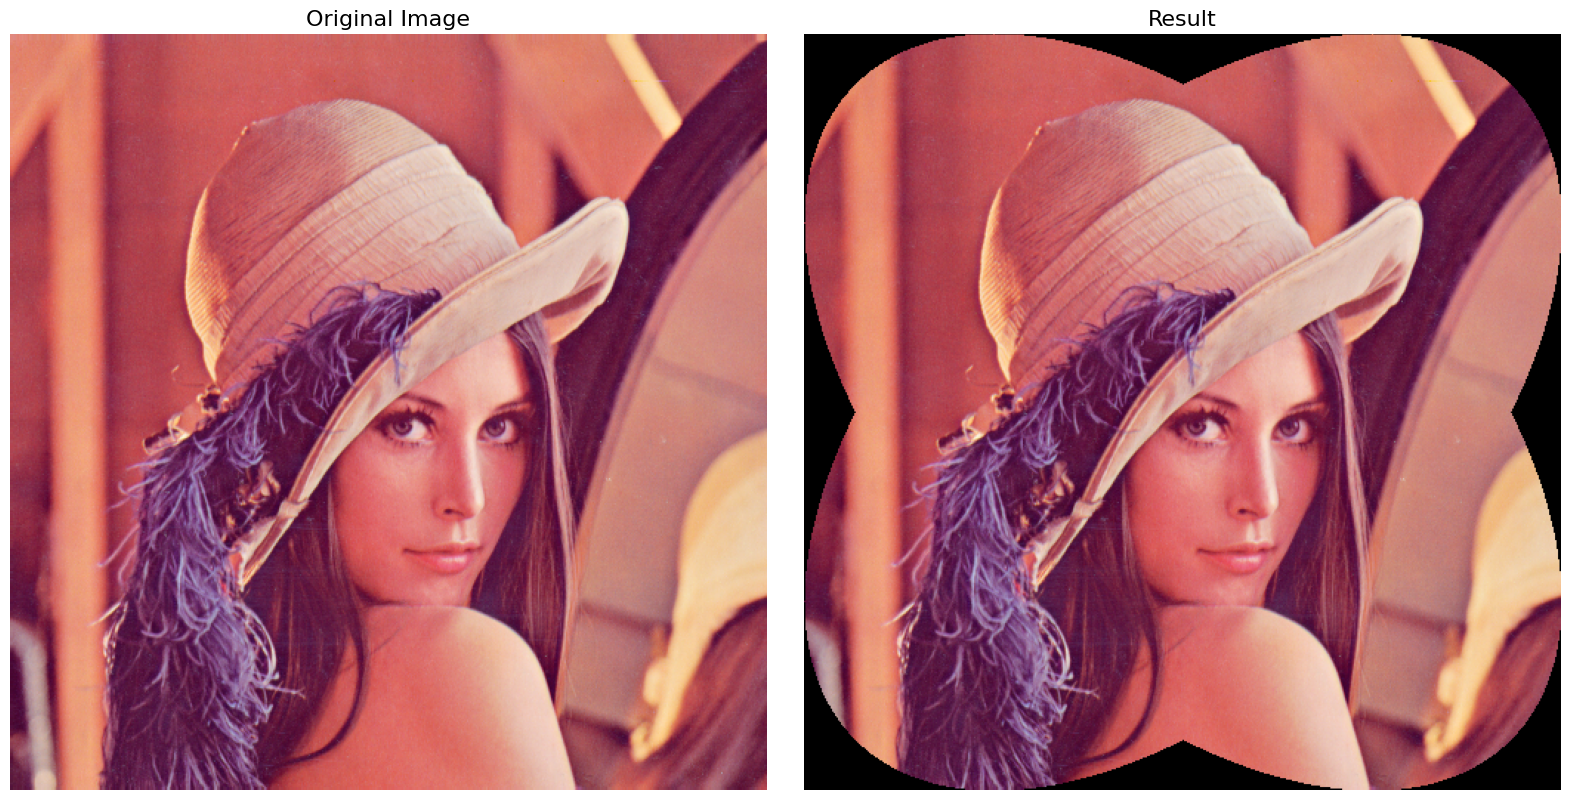

In [539]:
if __name__ == '__main__':
    main()